# Projet 3 : Analyse de séquences génomiques

In [1]:
import Projet_Bioinfo as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import projet

## Préliminaires : données et lecture des fichiers

#### Question 1

In [3]:
for filename in ["sequences/regulatory_seq_PHO.fasta",
                 "sequences/regulatory_seqs_GAL.fasta",
                 "sequences/regulatory_seqs_MET.fasta",
                 "sequences/yeast_s_cerevisae_genomic_chr1-4.fna"]:
    dico_chro = pb.read_fasta(filename)
    total = 0
    for chrome in dico_chro:
        total += sum(pb.nucleotide_count(dico_chro[chrome]))
    print("Fichier {} : {} séquences, {} nucléotides.".format(filename, len(dico_chro.keys()), total))

Fichier sequences/regulatory_seq_PHO.fasta : 5 séquences, 4000 nucléotides.
Fichier sequences/regulatory_seqs_GAL.fasta : 7 séquences, 5608 nucléotides.
Fichier sequences/regulatory_seqs_MET.fasta : 9 séquences, 7200 nucléotides.
Fichier sequences/yeast_s_cerevisae_genomic_chr1-4.fna : 4 séquences, 2515853 nucléotides.


#### Question 2

In [4]:
dico_chro = pb.read_fasta("sequences/yeast_s_cerevisae_genomic_chr1-4.fna")
liste_gen = []
for chrome in dico_chro:
    liste_gen += dico_chro[chrome] 

a, c, g, t = pb.nucleotide_frequency(liste_gen)
print("Fréquence des nucléotides :")
print("A : {:.5f}".format(a))
print("C : {:.5f}".format(c))
print("G : {:.5f}".format(g))
print("T : {:.5f}".format(t))

Fréquence des nucléotides :
A : 0.29984
C : 0.20110
G : 0.20000
T : 0.29907


#### Question 3

Test de la fonction `logproba`.

In [5]:
p_log = projet.logproba(liste_gen, (a,c,g,t))
print("Log-probabilité de la séquence dans liste_gen :", p_log)
p_log = projet.logproba([pb.nucleotide[i] for i in "CGT"], (a,c,g,t))
print("Log_probabilité de la séquence CGT :", p_log)

Log-probabilité de la séquence dans liste_gen : -3438164.462646954
Log_probabilité de la séquence CGT : -4.420488639322931


#### Question 4

Test de la fonction `logprobafast`.

In [6]:
p_log_fast = projet.logprobafast(pb.nucleotide_count(liste_gen), (a,c,g,t))
print("Log-probabilité de la séquence dans liste_gen :", p_log_fast)
p_log_fast = projet.logprobafast([0, 1, 1, 1], (a,c,g,t))
print("Log_probabilité de la séquence CGT :", p_log_fast)

Log-probabilité de la séquence dans liste_gen : -3438164.4626395022
Log_probabilité de la séquence CGT : -4.420488639322931


## Annotation des régions promoteurs

### Description Empirique, préliminaires

Création des listes de nucléotides à partir des trois fichiers.

In [7]:
dico_PHO = pb.read_fasta("sequences/regulatory_seq_PHO.fasta")
dico_GAL = pb.read_fasta("sequences/regulatory_seqs_GAL.fasta")
dico_MET = pb.read_fasta("sequences/regulatory_seqs_MET.fasta")

liste_PHO = []
liste_GAL = []
liste_MET = []

for code in dico_PHO:
    liste_PHO += dico_PHO[code]
    
for code in dico_GAL:
    liste_GAL += dico_GAL[code]
    
for code in dico_MET:
    liste_MET += dico_MET[code]    

#### Question 1(a)
Test de la fonction `code`.

In [8]:
test = [3, 0, 1]
projet.code(test, len(test))

49

#### Question 1(b)
Test de la fonction `inverse`.

In [9]:
projet.inverse(49, 3)

[3, 0, 1]

#### Question 1(c)

Test de la fonction `comptage`.

In [10]:
seq = "ATCATG"
print("Représentation par chaine de caractères :", projet.comptage(seq, 2))
seq = pb.encode_sequence(seq)
print("Représentation par liste d'entiers :", projet.comptage(seq, 2))

Représentation par chaine de caractères : {'AT': 2, 'TC': 1, 'CA': 1, 'TG': 1}
Représentation par liste d'entiers : {3: 2, 13: 1, 4: 1, 14: 1}


#### Question 2

In [11]:
print("Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :")
for i, esp in enumerate(projet.comptage_attendu([a, c, g, t], 2, 100)):
    print("Mot {} : {:.4f}".format(projet.inverse(i, 2), esp))

Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :
Mot [0, 0] : 8.9002
Mot [0, 1] : 5.9695
Mot [0, 2] : 5.9367
Mot [0, 3] : 8.8774
Mot [1, 0] : 5.9695
Mot [1, 1] : 4.0038
Mot [1, 2] : 3.9818
Mot [1, 3] : 5.9541
Mot [2, 0] : 5.9367
Mot [2, 1] : 3.9818
Mot [2, 2] : 3.9599
Mot [2, 3] : 5.9214
Mot [3, 0] : 8.8774
Mot [3, 1] : 5.9541
Mot [3, 2] : 5.9214
Mot [3, 3] : 8.8546


#### Question 3

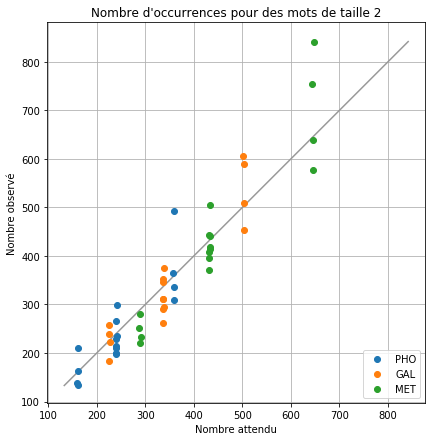

In [12]:
projet.graphe_occurrences((a, c, g, t), 2, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_2.png")

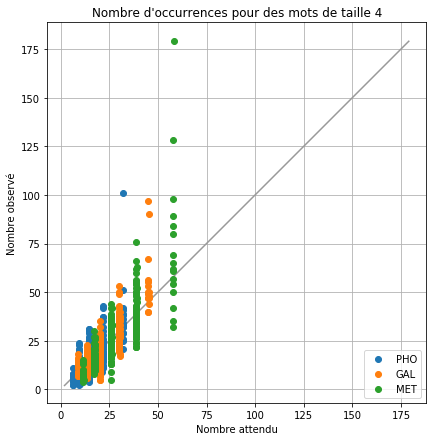

In [13]:
projet.graphe_occurrences((a, c, g, t), 4, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_4.png")

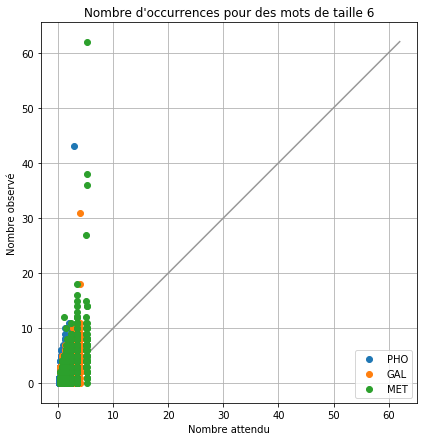

In [14]:
projet.graphe_occurrences((a, c, g, t), 6, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_6.png")

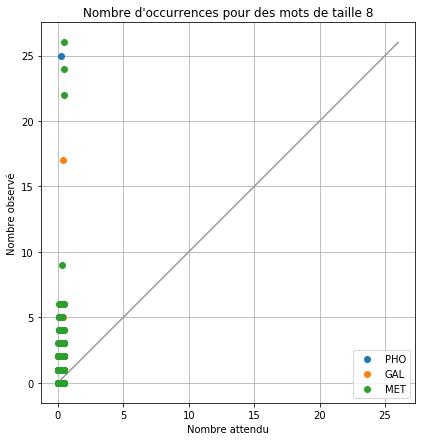

In [15]:
projet.graphe_occurrences((a, c, g, t), 8, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                          "graphe_occurrences_8.png")

### Simulation de séquences aléatoires

#### Question 1

Test de la fonction `simule_sequence`.

In [16]:
test = projet.simule_sequence(1000000, (a, c, g, t))

#### Question 2
On fait le graphe avec les occurrences pour une séquence de longueur 1000000 et des mots de taille 6.

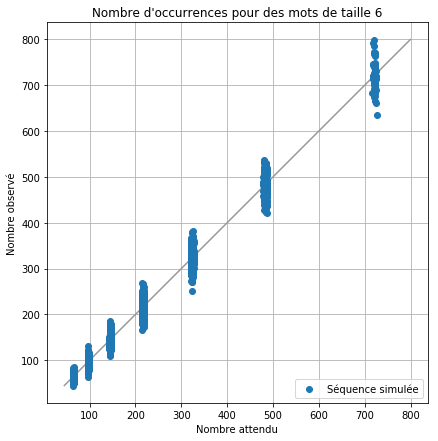

In [17]:
projet.graphe_occurrences((a, c, g, t), 6, {"Séquence simulée" : test}, "graphe_occurrences_simul.png")

#### Question 3
Test de la fonction `proba_empirique`.

In [18]:
probas = {}
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    print("Mot "+mot+":")
    probas[mot] = projet.proba_empirique(pb.encode_sequence(mot), 10000, (a, c, g, t), 1000)
    print(probas[mot])
    print("")

Mot ATCTGC:
{3: 0.185, 2: 0.262, 4: 0.122, 1: 0.244, 0: 0.12, 5: 0.042, 6: 0.016, 8: 0.003, 7: 0.006}

Mot ATATAT:
{8: 0.143, 6: 0.123, 9: 0.093, 11: 0.053, 3: 0.066, 7: 0.133, 4: 0.084, 5: 0.13, 13: 0.012, 10: 0.068, 14: 0.013, 12: 0.036, 2: 0.028, 1: 0.006, 16: 0.002, 15: 0.007, 0: 0.001, 17: 0.001, 18: 0.001}

Mot TTTAAA:
{6: 0.169, 2: 0.016, 8: 0.155, 7: 0.147, 4: 0.087, 11: 0.042, 12: 0.03, 9: 0.087, 13: 0.015, 5: 0.114, 3: 0.046, 10: 0.071, 15: 0.002, 14: 0.008, 1: 0.007, 16: 0.003, 17: 0.001}

Mot AAAAAA:
{9: 0.067, 1: 0.015, 6: 0.123, 10: 0.078, 5: 0.106, 16: 0.011, 4: 0.098, 3: 0.07, 11: 0.059, 8: 0.11, 12: 0.037, 14: 0.017, 0: 0.003, 7: 0.106, 13: 0.026, 2: 0.048, 15: 0.015, 17: 0.007, 18: 0.002, 22: 0.002}



#### Question 4

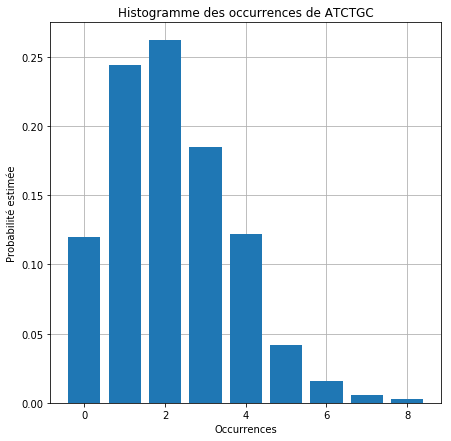

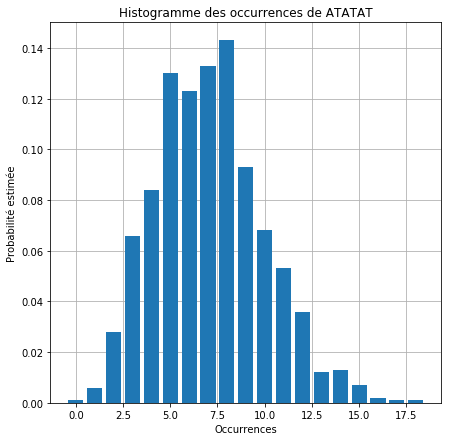

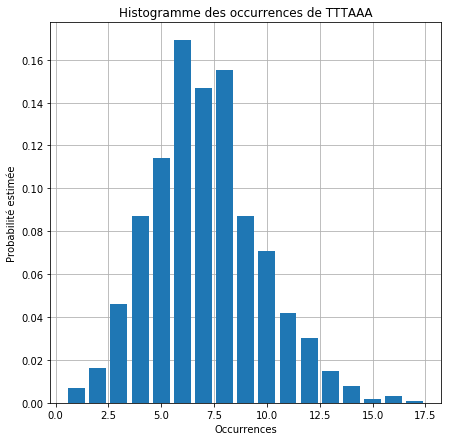

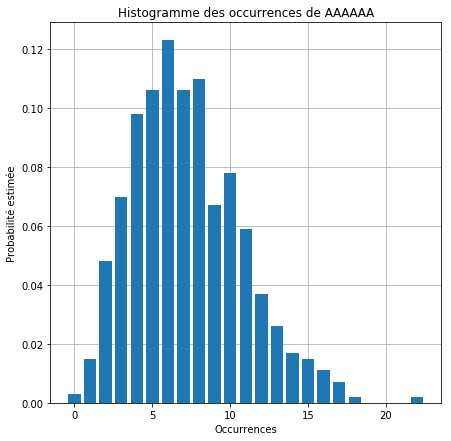

In [19]:
for mot in probas:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.bar(probas[mot].keys(), probas[mot].values())
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences de "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    fig.savefig("Rapport/Figures/histogramme_"+mot+".png")

#### Question 5

On représente graphiquement les intervalles de confiance avec des lignes sur les barres.

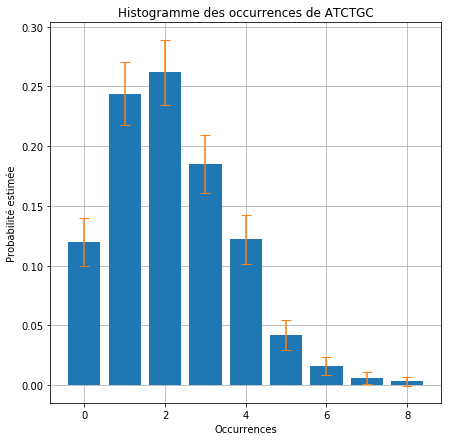

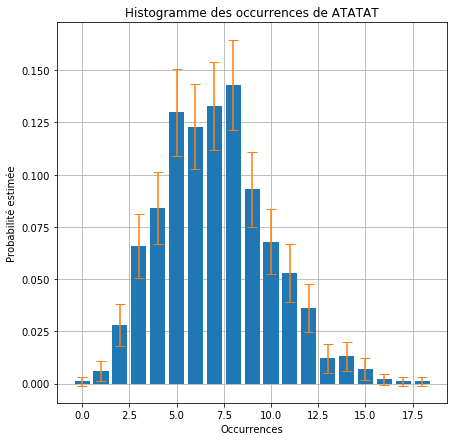

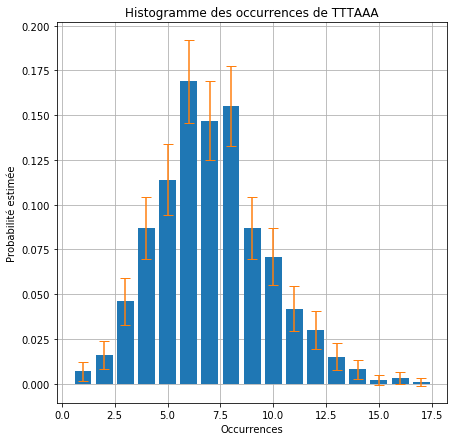

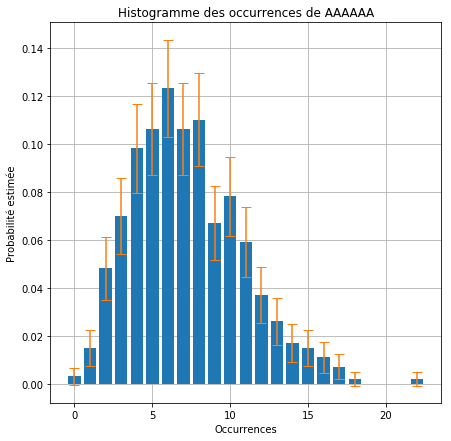

In [20]:
N = 1000 # Valeur utilisée dans le calcul de la probabilité empirique.
for mot in probas:
    fig, ax = plt.subplots(figsize=(7, 7))
    keys = np.array([x for x in probas[mot].keys()])
    vals = np.array([x for x in probas[mot].values()])
    ax.bar(keys, vals, yerr=1.96*np.sqrt(vals*(1-vals)/N), ecolor="C1", capsize=5)
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences de "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    fig.savefig("Rapport/Figures/histogramme_"+mot+"_errorbar.png")

### Modèles de dinucléotides et trinucléotides

#### Question 2
Test de la fonction `estim_M`.

In [27]:
M = projet.estim_M(liste_gen)
print("Matrice M estimée :")
print(M)

Matrice M estimée :
[[0.3250462  0.18551797 0.20059204 0.28884379]
 [0.33570778 0.2092548  0.1575632  0.29747422]
 [0.31321125 0.20244971 0.20774423 0.27659481]
 [0.24149361 0.2103415  0.2227537  0.32541118]]


#### Question 3
Test de la fonction `simule_Markov`.

In [40]:
print(projet.simule_Markov((a, c, g, t), M, 50))

[0 3 3 0 3 3 3 3 1 2 2 3 2 2 3 3 0 3 3 3 3 0 3 2 0 1 3 3 3 1 1 0 0 0 0 1 1
 3 0 2 3 1 2 1 0 3 0 3 1 3]


#### Question 4
Test de la fonction `logproba_mot_Markov`.

In [41]:
projet.logproba_mot_Markov([1, 2, 3], (a, c, g, t), M)

-4.737073390417531

#### Question 5
Test de la fonction `comptage_attendu_Markov`.

In [42]:
print("Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :")
for i, esp in enumerate(projet.comptage_attendu_Markov([a, c, g, t], M, 2, 100)):
    print("Mot {} : {:.4f}".format(projet.inverse(i, 2), esp))

Espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 :
Mot [0, 0] : 9.6486
Mot [0, 1] : 5.5069
Mot [0, 2] : 5.9543
Mot [0, 3] : 8.5740
Mot [1, 0] : 6.6836
Mot [1, 1] : 4.1661
Mot [1, 2] : 3.1369
Mot [1, 3] : 5.9224
Mot [2, 0] : 6.2015
Mot [2, 1] : 4.0084
Mot [2, 2] : 4.1133
Mot [2, 3] : 5.4765
Mot [3, 0] : 7.1500
Mot [3, 1] : 6.2277
Mot [3, 2] : 6.5952
Mot [3, 3] : 9.6346


#### Question 6

In [46]:
nucleotide_inverse = {0:'A',1:'C',2:'G',3:'T'}
print("Comparaison de l'espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 "+
      "pour le modèle indépendant (nucléotide) et le modèle par chaîne de Markov (dinucléotide) :")
cptNucl = projet.comptage_attendu([a, c, g, t], 2, 100)
cptDinucl = projet.comptage_attendu_Markov([a, c, g, t], M, 2, 100)
print("Mot Nucléotide Dinucléotide")
for i in range(len(cptNucl)):
    print("".join([nucleotide_inverse[j] for j in projet.inverse(i, 2)]), end="  ")
    print("{:.4f}".format(cptNucl[i]), end="     ")
    print("{:.4f}".format(cptDinucl[i]))

Comparaison de l'espérance du nombre d'occurences de chaque mot de taille 2 dans une séquence de taille 100 pour le modèle indépendant (nucléotide) et le modèle par chaîne de Markov (dinucléotide) :
Mot Nucléotide Dinucléotide
AA  8.9002     9.6486
AC  5.9695     5.5069
AG  5.9367     5.9543
AT  8.8774     8.5740
CA  5.9695     6.6836
CC  4.0038     4.1661
CG  3.9818     3.1369
CT  5.9541     5.9224
GA  5.9367     6.2015
GC  3.9818     4.0084
GG  3.9599     4.1133
GT  5.9214     5.4765
TA  8.8774     7.1500
TC  5.9541     6.2277
TG  5.9214     6.5952
TT  8.8546     9.6346


#### Question 7

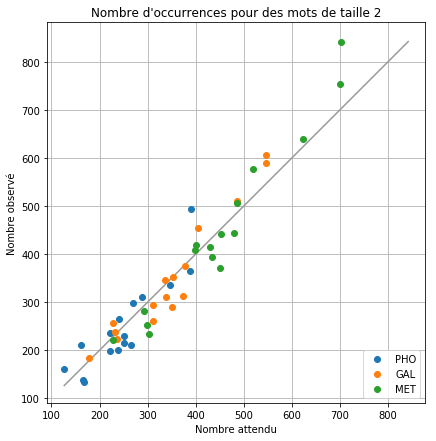

In [60]:
projet.graphe_occurrences_Markov((a, c, g, t), M, 2, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                                 "graphe_occurrences_Markov_2.png")

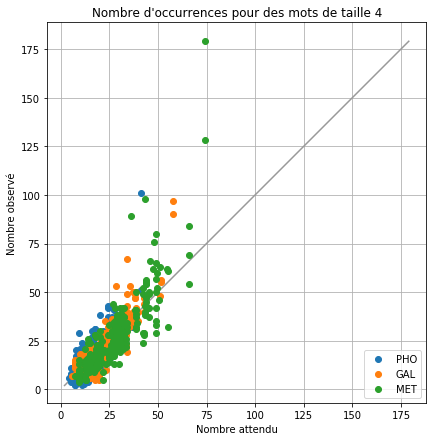

In [59]:
projet.graphe_occurrences_Markov((a, c, g, t), M, 4, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                                 "graphe_occurrences_Markov_4.png")

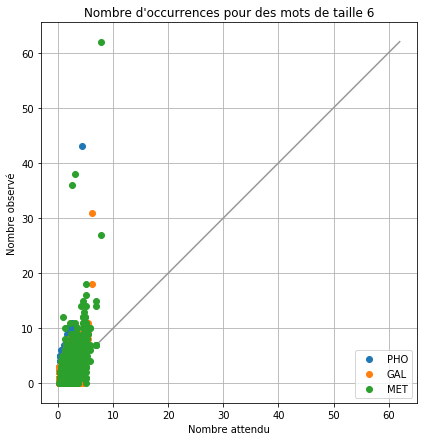

In [58]:
projet.graphe_occurrences_Markov((a, c, g, t), M, 6, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                                 "graphe_occurrences_Markov_6.png")

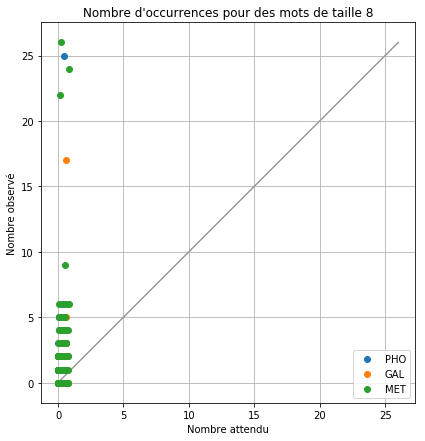

In [57]:
projet.graphe_occurrences_Markov((a, c, g, t), M, 8, {"PHO": liste_PHO, "GAL": liste_GAL, "MET": liste_MET},
                                 "graphe_occurrences_Markov_8.png")

### Probabilités de mots